**I. INPUT VISUALIZATION**


In [2]:
import csv
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt
import itertools
import collections
import re
from nltk import pos_tag
from nltk.tokenize import word_tokenize, sent_tokenize
from nltk.stem import WordNetLemmatizer
from nltk.corpus import stopwords
from collections import Counter
import seaborn as sns
from wordcloud import WordCloud, STOPWORDS, ImageColorGenerator
import nltk
nltk.download(['punkt', 'wordnet', 'averaged_perceptron_tagger', 'stopwords','omw-1.4'])

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\nguye\AppData\Roaming\nltk_data...
[nltk_data]   Unzipping tokenizers\punkt.zip.
[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\nguye\AppData\Roaming\nltk_data...
[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     C:\Users\nguye\AppData\Roaming\nltk_data...
[nltk_data]   Unzipping taggers\averaged_perceptron_tagger.zip.
[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\nguye\AppData\Roaming\nltk_data...
[nltk_data]   Unzipping corpora\stopwords.zip.
[nltk_data] Downloading package omw-1.4 to
[nltk_data]     C:\Users\nguye\AppData\Roaming\nltk_data...


True

In [ ]:

# input = files.upload()

Saving animal-crossing.csv to animal-crossing.csv


In [4]:
#Lets Take our Critics Data!
df=pd.read_csv('./data/animal-crossing.csv')
print(df)

     grade       publication  \
0      100   Pocket Gamer UK   
1      100            Forbes   
2      100         Telegraph   
3      100             VG247   
4      100  Nintendo Insider   
..     ...               ...   
102     90      Impulsegamer   
103     90        PLAY! Zine   
104     95          GameGrin   
105     90       NF Magazine   
106     80             PCMag   

                                                  text        date  
0    Animal Crossing; New Horizons, much like its p...  2020-03-16  
1    Know that if you’re overwhelmed with the world...  2020-03-16  
2    With a game this broad and lengthy, there’s mo...  2020-03-16  
3    Animal Crossing: New Horizons is everything I ...  2020-03-16  
4    Above all else, Animal Crossing: New Horizons ...  2020-03-16  
..                                                 ...         ...  
102  Animal Crossing New Horizons is pure fun and p...  2020-04-16  
103  Animal Crossing: New Horizons is a definitive ...  2020-04

1. Histogram 

C:\Users\nguye\AppData\Local\Temp\ipykernel_23332\2811940297.py:2: MatplotlibDeprecationWarning: The seaborn styles shipped by Matplotlib are deprecated since 3.6, as they no longer correspond to the styles shipped by seaborn. However, they will remain available as 'seaborn-v0_8-<style>'. Alternatively, directly use the seaborn API instead.
  plt.style.use('seaborn-darkgrid')


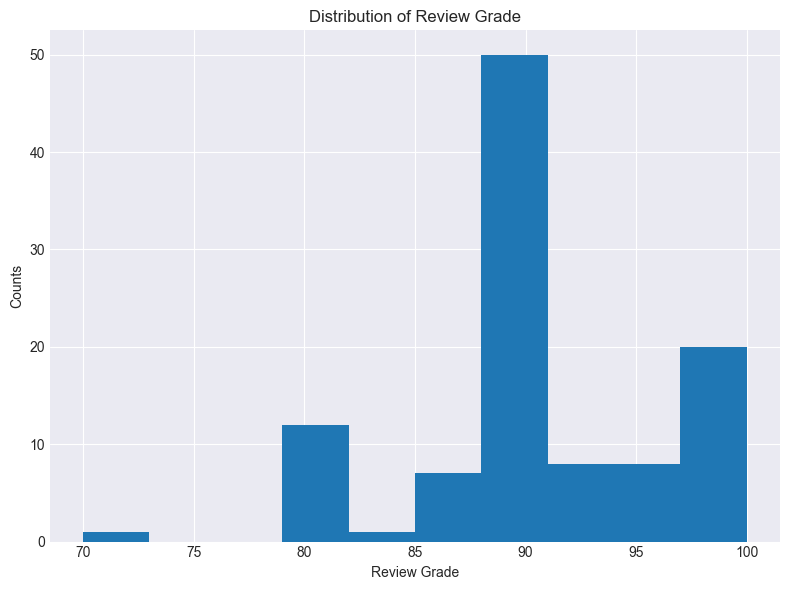

In [6]:
#@title Histogram Plot
plt.style.use('seaborn-darkgrid')
plt.figure(figsize=(8,6))
plt.hist(df['grade'],bins=10)
plt.title("Distribution of Review Grade")
plt.xlabel('Review Grade')
plt.ylabel('Counts')
plt.tight_layout()
plt.savefig('./visualization_output/input_histogram.png')


2. Pie chart

In [7]:
#@title Group grades
categories = dict()
for i in range(0, 107):
  if str(df.loc[i][0]) in categories:  
    categories[str(df.loc[i][0])] += 1
  else:
    categories[str(df.loc[i][0])] = 1

print(categories)

group_cat={'96-100':0,'90-95':0,'80-89':0,'70-79':0}

for i in range(70,101):
  if str(i) in categories:
    if 96<=i<=100:
      group_cat['96-100']+=categories[str(i)]
    elif 90<=i<=95:
      group_cat['90-95']+=categories[str(i)]
    elif 80<=i<=89:
      group_cat['80-89']+=categories[str(i)]
    elif 70<=i<=79:
      group_cat['70-79']+=categories[str(i)]

print(group_cat)


{'100': 19, '95': 6, '94': 2, '93': 3, '92': 3, '91': 2, '90': 48, '88': 2, '86': 1, '85': 6, '82': 1, '80': 11, '98': 1, '81': 1, '70': 1}
{'96-100': 20, '90-95': 64, '80-89': 22, '70-79': 1}


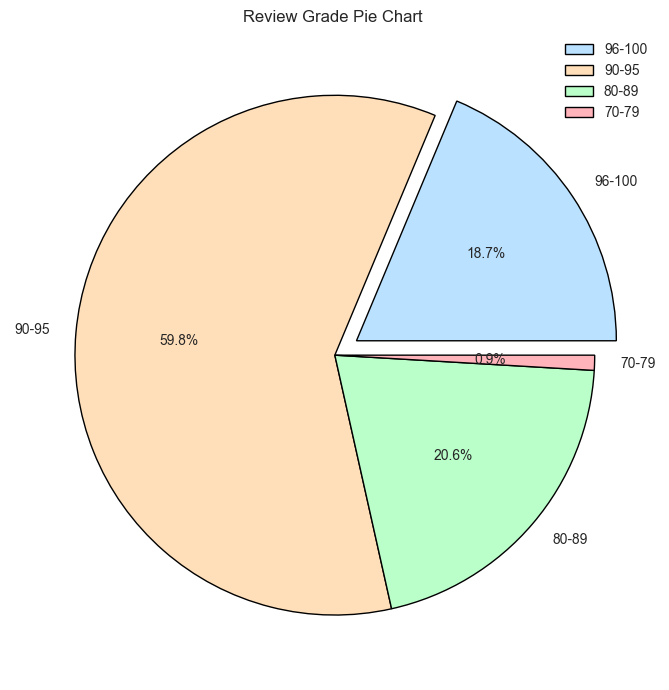

In [8]:
#@title Pie Plot
slices=group_cat.values()
labels=group_cat.keys()
myexplode = [0.1, 0, 0, 0]
mycolors=['#bae1ff','#ffdfba','#baffc9','#ffb3ba'] #pastel 
fig = plt.figure(figsize =(7, 7))
plt.pie(slices,labels=labels,wedgeprops={'edgecolor':'black'},shadow=False,autopct='%1.1f%%',explode = myexplode,colors=mycolors)

plt.title("Review Grade Pie Chart ")
plt.legend()
plt.tight_layout()

plt.savefig('./visualization_output/input_piechart.png')


**II. OUTPUT VISUALIZATION**


In [ ]:
# output = files.upload()

Saving model-output.csv to model-output (1).csv


In [11]:
#Lets Take our Critics Data!
df1=pd.read_csv('./data/model-output.csv')
print(df1)

                                                  text   score
0    Animal Crossing; New Horizons, much like its p...  0.6605
1    With a game this broad and lengthy, there’s mo...  0.9769
2    Above all else, Animal Crossing: New Horizons ...  0.9628
3    Nintendo's comforting life sim is a tranquil h...  0.4404
4    Animal Crossing: New Horizons takes Animal Cro...  0.9929
..                                                 ...     ...
102  New Horizons is simply the best Animal Crossin...  0.9062
103  Animal Crossing has always been a series where...  0.9932
104  Animal Crossing: New Horizons is a definitive ...  0.3182
105  I can't wait to see what the future will hold....  0.0000
106  Animal Crossing: New Horizons brings the most ...  0.0000

[107 rows x 2 columns]


1. Sentiment Score (Model Output Score)

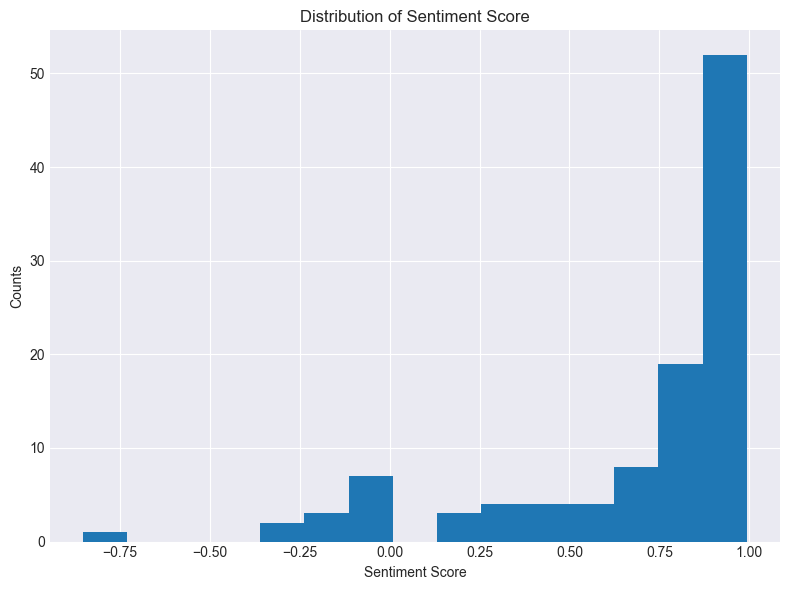

In [12]:
#@title Histogram Plot
plt.figure(figsize=(8,6))
plt.hist(df1['score'],bins=15)
plt.title("Distribution of Sentiment Score")
plt.xlabel('Sentiment Score')
plt.ylabel('Counts')
plt.tight_layout()
plt.savefig('./visualization_output/output_histogram.png')

Here, we can note that the graph is biased towards the right side, and hence this is a sign of distribution, which is left-skewed distribution. A large number of data values occur on the right side and fewer data on the left side.
It indicates that many have positive and very positive opinions. Relatively fewer put some neutral or negative words. 


2. Word Cloud (Popular words in review text)





In [13]:
#@title Declare Wordcloud
texts = df1['text'].tolist()

# # We will want to remove stop words
stop_words = set(stopwords.words('english'))

# update stop words
stop_words.update(['this', 'game', 'the', 'play','Horizons','Crossing','New'])

wordcloud = WordCloud(
    width = 3000,
    height = 2000,
    background_color = 'black',
    stopwords=stop_words
    ).generate(str(texts))


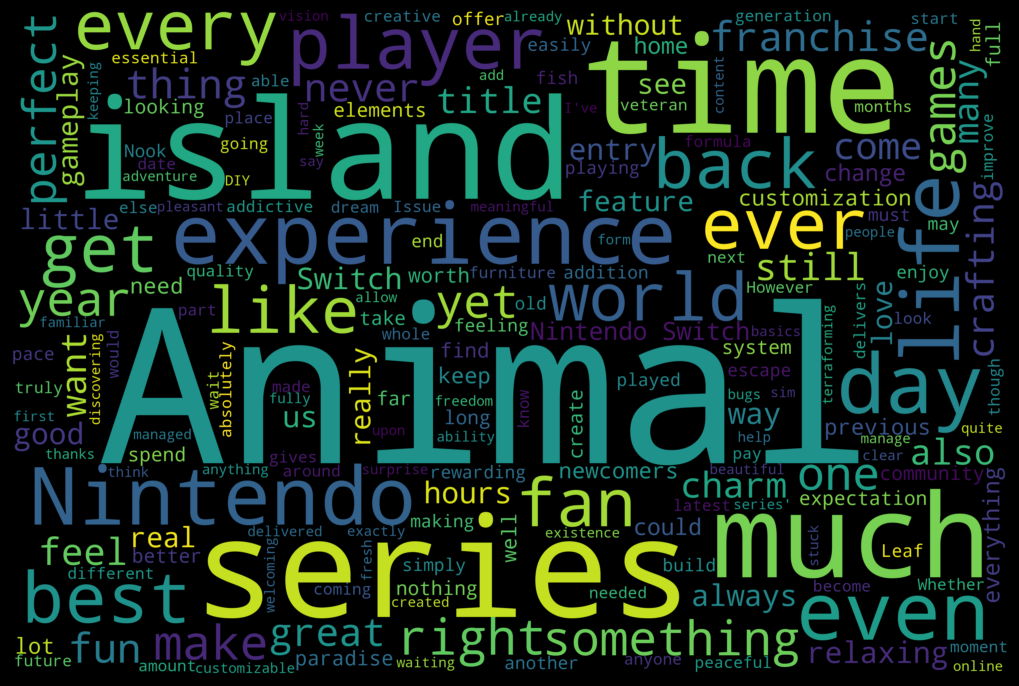

In [14]:
#@title Wordcloud Plot
fig = plt.figure(
    figsize = (10, 8),
    facecolor = 'k',
    edgecolor = 'k')
plt.imshow(wordcloud, interpolation = 'bilinear')
plt.axis('off')
plt.tight_layout(pad=0)

plt.savefig('./visualization_output/output_wordcloud(most_pop_words).png')

Animal Crossing is a social video game developed Nintendo. In Animal Crossing, the player character is a human who lives in an island w animals. The player can carry out many activities to develops the island as they want.
Some words like Animal, island,series appear the most frequently.
The pl like the game put some positive words in general, the best, fun,relaxing etc.


3. Most popular adjective (2 barh) [-1,0.25) [0.25,1)

In [46]:
df1['target'] = pd.cut(df1.score,bins=[-1,0.25,1], labels=[0, 1])
df1.target.value_counts()
# print(df1.to_string())

1    91
0    16
Name: target, dtype: int64

In [47]:
#@title Word Counter
def tokenize(text):
    """Tokenize each review text
    Args: text
    Return: token lists after normalization and lemmatization
    """
    # remove punctuation and change to lowercase
    text = re.sub(r'[^a-zA-Z0-9]', ' ', text).lower()
    # tokenize the word into words
    tokens = word_tokenize(text)

    # remove stopwords
    stop_words  = set(stopwords.words('english'))
    
    tokens = [word for word in tokens if word not in stop_words]

    # lemmatize the word
    lemmatizer = WordNetLemmatizer()
    clean_token = []
    for token in tokens:
        clean_token.append(lemmatizer.lemmatize(token, pos='v').lower().strip())
    return clean_token

In [48]:
#@title Concatenate commments
# concatenate all comments in low grade group 
dict_low = df1[df1.target == 0].to_dict(orient='list')
low_grade = dict_low['text']

dict_high = df1[df1.target == 1].to_dict(orient='list')
high_grade = dict_high['text']

# print(dict_low)
# print(low_grade)
# print(dict_high)
# print(high_grade)

In [49]:
#@title Tokenize text
# tokenize text for Counter
low_grade = ' '.join(low_grade)
low_tokens = tokenize(low_grade)

high_grade = ' '.join(high_grade)
high_tokens = tokenize(high_grade)

# print(low_grade)
# print(low_tokens)

In [50]:
#@title Select Adjectives
# use pos_tag in NLP to select adjectives
ad_tokens_low = []
for word, tag in pos_tag(low_tokens):
    if tag in ('JJ', 'JJR', 'JJS'):
        ad_tokens_low.append(word)

ad_tokens_high = []
for word, tag in pos_tag(high_tokens):
    if tag in ('JJ', 'JJR', 'JJS'):
        ad_tokens_high.append(word)

# print(ad_tokens_low)
# print(ad_tokens_high)

In [51]:
#@title Count
# Count the most popular adjective/adverb 
ad_low_counter = Counter(ad_tokens_low)

ad_high_counter = Counter(ad_tokens_high)

# print(ad_low_counter)
# print(ad_high_counter)
ad_low_counter.pop('new')
ad_low_counter.pop('animal')
ad_low_counter.pop('nintendo')


ad_high_counter.pop('new')
ad_high_counter.pop('animal')
ad_high_counter.pop('fish')
ad_high_counter.pop('nintendo')


ad_low_top20 = ad_low_counter.most_common(20)
ad_high_top20 = ad_high_counter.most_common(20)

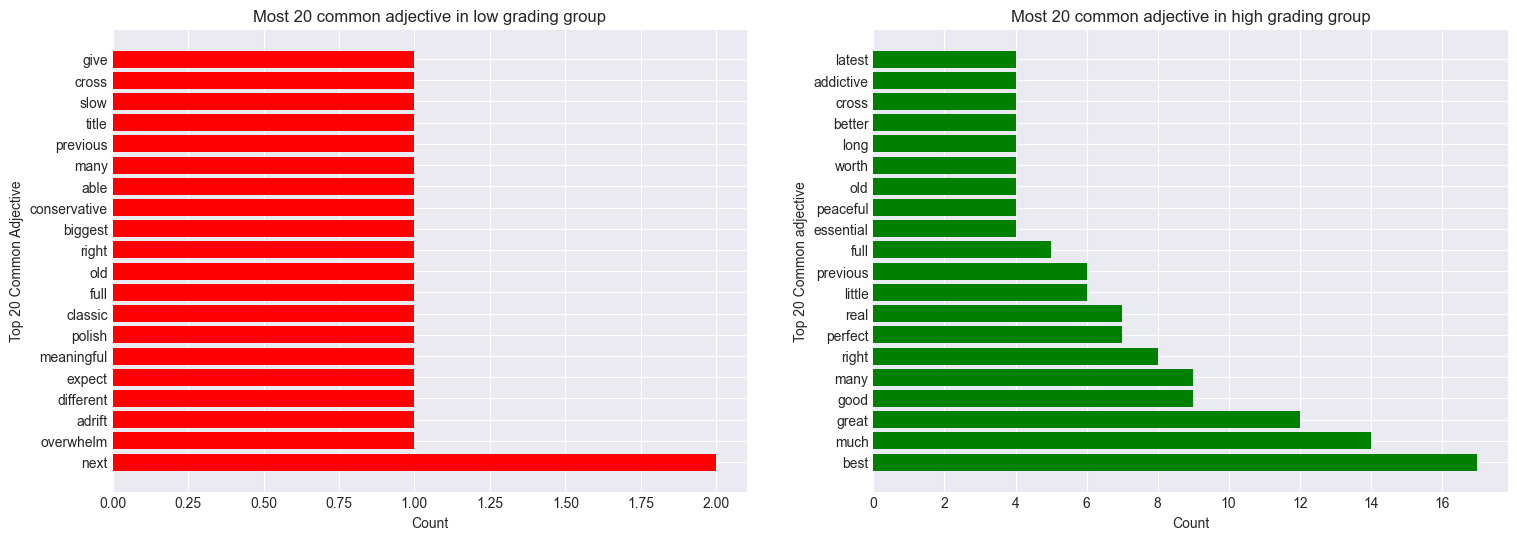

In [52]:
#@title Bar Plot

plt.figure(figsize=(18, 6))
plt.subplot(1, 2, 1)
plt.barh(range(len(ad_low_top20)), [val[1] for val in ad_low_top20], align='center',color='red')
plt.yticks(range(len(ad_low_top20)), [val[0] for val in ad_low_top20])
plt.xlabel('Count')
plt.ylabel('Top 20 Common Adjective')
plt.title('Most 20 common adjective in low grading group')

plt.subplot(1, 2, 2)
plt.barh(range(len(ad_high_top20)), [val[1] for val in ad_high_top20], align='center',color='green')
plt.yticks(range(len(ad_high_top20)), [val[0] for val in ad_high_top20])
plt.xlabel('Count')
plt.ylabel('Top 20 Common adjective')
plt.title('Most 20 common adjective in high grading group')

plt.savefig('./visualization_output/output_barh(most_adj_comp).png')

One thing maybe interesting to see is to look at the most common adjective to see how people decribe their exprience.
The people like the game tend to put more discriptive adj in their reviews, thinking it's the best, great, perfect. Also, we can see that in generally people feel bad about the game dont describe it clearly (?).

4. Correlation between Score and Text Length

In [53]:
#@title Hide
from collections import OrderedDict

def word_count(str):
    counts = dict()
    words = str.split()

    for word in words:
        if word in counts:
            counts[word] += 1
        else:
            counts[word] = 1

    return len(words)


out_categories = dict()
for i in range(0, 107): 
  out_categories[df1.loc[i][1]] = word_count(df1.loc[i][0])

sort_by_length = dict(sorted(out_categories.items(), key=lambda item: item[1]))
sort_by_score = OrderedDict(sorted(out_categories.items()))

# print(sort_by_length)
# print(sort_by_score)

C:\Users\nguye\AppData\Local\Temp\ipykernel_23332\2186664220.py:32: MatplotlibDeprecationWarning: The seaborn styles shipped by Matplotlib are deprecated since 3.6, as they no longer correspond to the styles shipped by seaborn. However, they will remain available as 'seaborn-v0_8-<style>'. Alternatively, directly use the seaborn API instead.
  plt.style.use('seaborn-darkgrid')


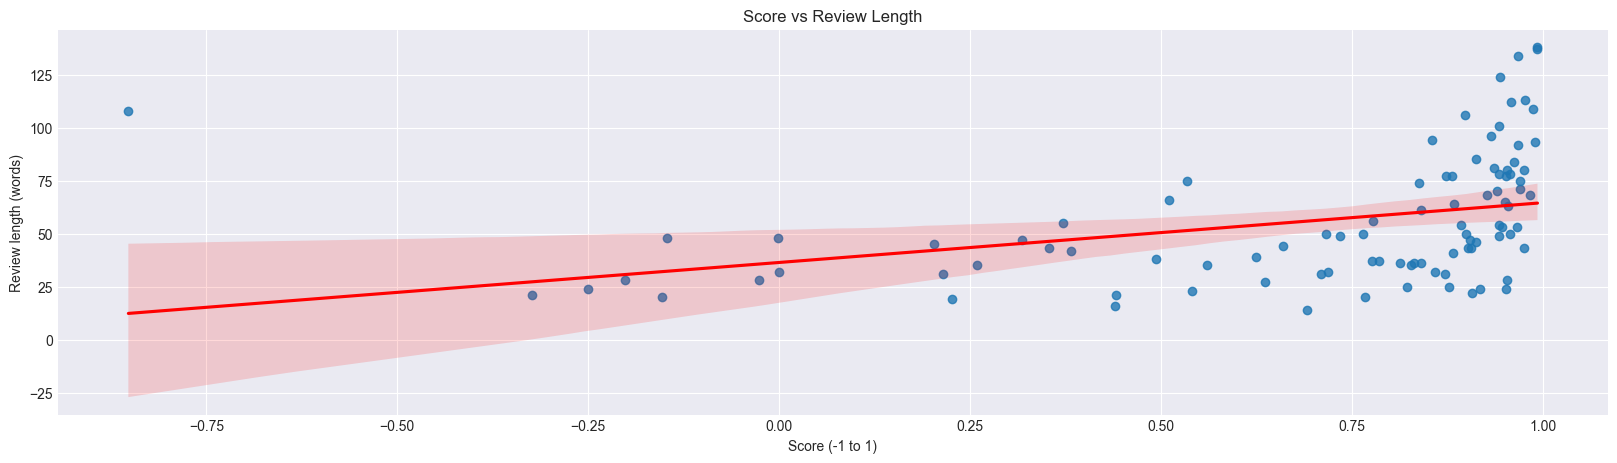

In [40]:
#@title Linegraph

from collections import OrderedDict

def word_count(str):
    counts = dict()
    words = str.split()

    for word in words:
        if word in counts:
            counts[word] += 1
        else:
            counts[word] = 1

    return len(words)


out_categories = dict()
for i in range(0, 107): 
  out_categories[df1.loc[i][1]] = word_count(df1.loc[i][0])

sort_by_length = dict(sorted(out_categories.items(), key=lambda item: item[1]))
sort_by_score = OrderedDict(sorted(out_categories.items()))

line_char_x = []
line_char_y = []

for score, length in sort_by_score.items():
  line_char_x += [score]
  line_char_y += [length]

plt.style.use('seaborn-darkgrid')
fig = plt.figure(figsize =(20, 5))
# plt.scatter(line_char_x, line_char_y)
# plt.plot(np.unique(line_char_x), np.poly1d(np.polyfit(line_char_x,line_char_y, 1))
#          (np.unique(line_char_x)), color='red')
reg=sns.regplot(x=line_char_x, y=line_char_y, line_kws={"color": "red"})
plt.xlabel('Score (-1 to 1)')
plt.ylabel('Review length (words)')
plt.title("Score vs Review Length")
plt.show()
# fig=reg.get_figure()
reg.figure.savefig('./visualization_output/output_reg.png')

When there is no clear relationship between the two variables, we say there is no correlation between the two variables.
